<p align="center">
<FONT FACE="times new roman" SIZE=5>
<br>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png"
width="250" height="250">
</img>
<br>
<i><b>Docente:</b> Juan Pablo Ospina Lopez.</i>
<br>
<i><b>Asignatura:</b> Inteligencia Artificial</i>
<br>
<i><b>Estudiante:</b> Chiara Vivian Valenzuela Losada</i>
<br>
<i><b>Tema:</b> Evaluando un modelo.</i>
<br>
<i>21/09/2023</i>
</FONT>
</p>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
plt.style.use('ggplot')

In [22]:
n = 20
X_train = np.linspace(-2, 2, n)
f = lambda x: 2.5 * (x**2) + 100
error = np.random.normal(loc=0, scale=3, size=n)
y_train = f(X_train) + error

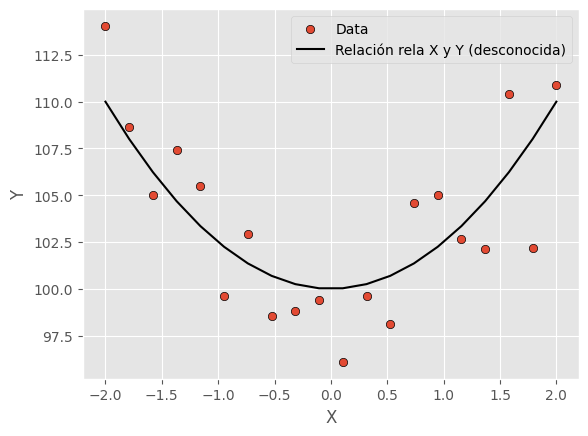

In [23]:
plt.scatter(X_train, y_train, edgecolors='black', label='Data')
plt.plot(X_train, f(X_train), color='black', label='Relación rela X y Y (desconocida)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [24]:
X_test = np.linspace(-2, 2, 20)
error_t = np.random.normal(loc=0, scale=4, size=20)
y_test = f(X_test) + error_t

### Lineal

In [25]:
X_train_ = X_train.reshape(-1,1)
y_train_ = y_train.reshape(-1,1)

model = LinearRegression()
model.fit(X_train_, y_train_)
y_hat = model.predict(X_train_)

### Polinomio Grado 6

In [26]:
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(X_train_)

model = LinearRegression()
model.fit(X_poly, y_train_)
y_hat_poly = model.predict(X_poly)

###Polinomio Grado 21

In [27]:
poly_2 = PolynomialFeatures(degree=21)
X_poly_2 = poly_2.fit_transform(X_train_)

model = LinearRegression()
model.fit(X_poly_2, y_train_)
y_hat_poly_21 = model.predict(X_poly_2)

###Gráficas

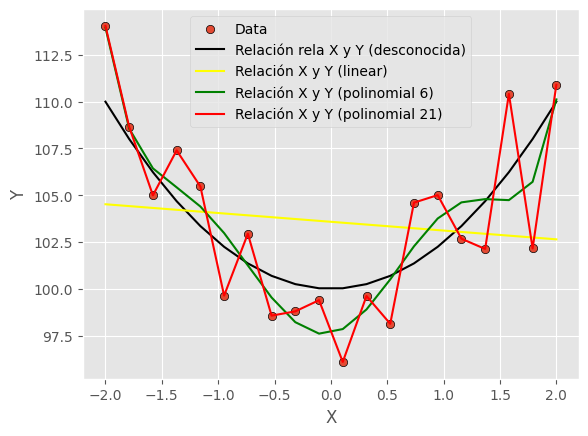

In [28]:
plt.scatter(X_train, y_train, edgecolors='black', label='Data')
plt.plot(X_train, f(X_train), color='black', label='Relación rela X y Y (desconocida)')
plt.plot(X_train, y_hat, color='yellow', label='Relación X y Y (linear)')
plt.plot(X_train, y_hat_poly, color='green', label='Relación X y Y (polinomial 6)')
plt.plot(X_train, y_hat_poly_21, color='red', label='Relación X y Y (polinomial 21)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

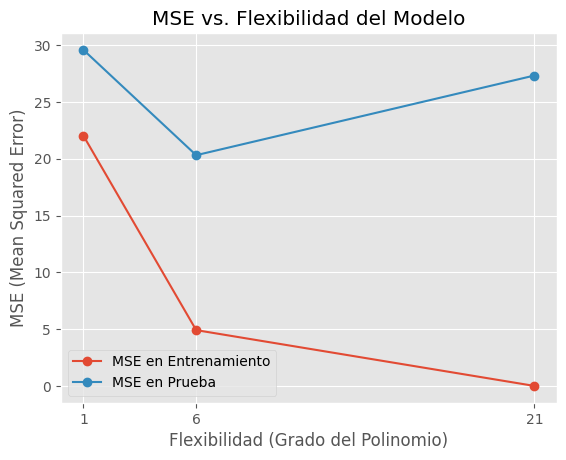

In [29]:
# Valores de flexibilidad (grados del polinomio)
flexibility_values = [1, 6, 21]

# Lista para almacenar los MSE
mse_train_values = [mean_squared_error(y_train, y_hat),mean_squared_error(y_train, y_hat_poly), mean_squared_error(y_train, y_hat_poly_21)]
mse_test_values = []

for degree in flexibility_values:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_train.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_poly, y_train_)
    X_test_ = poly.fit_transform(X_test.reshape(-1, 1))

    y_pred = model.predict(X_test_)

    # Calcula el MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_test_values.append(mse)

# Grafica MSE vs. Flexibilidad
plt.plot(flexibility_values, mse_train_values, marker='o', label='MSE en Entrenamiento')
plt.plot(flexibility_values, mse_test_values, marker='o', label='MSE en Prueba')
plt.xlabel('Flexibilidad (Grado del Polinomio)')
plt.ylabel('MSE (Mean Squared Error)')
plt.title('MSE vs. Flexibilidad del Modelo')
plt.grid(True)
plt.legend()
plt.xticks(flexibility_values)
plt.show()

In [30]:
print("Errores en train: ", mse_train_values)
print("Errores en tests: ", mse_test_values)

Errores en train:  [22.024006765668748, 4.91318655232787, 5.737704509618476e-17]
Errores en tests:  [29.58236317528711, 20.31401962442004, 27.32791111394918]
